## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

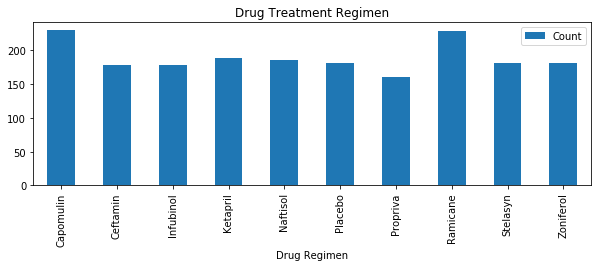

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatment Regimen")

plt.show()
plt.tight_layout()


<BarContainer object of 10 artists>

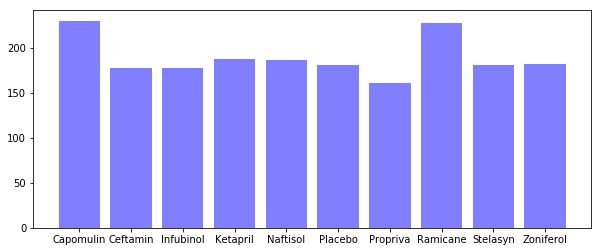

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

# Convert regimen count into a list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

x_axis = np.arange(len(regimen_count))

# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")


## Pie plots

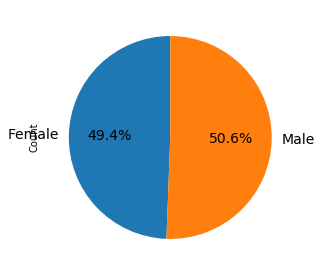

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=14)

([<matplotlib.patches.Wedge at 0x194f2340978>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

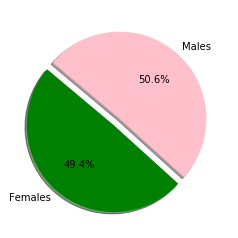

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count


# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["green", "pink"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers
merge_table.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

# Select data for Capomulin regimen and reset index
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


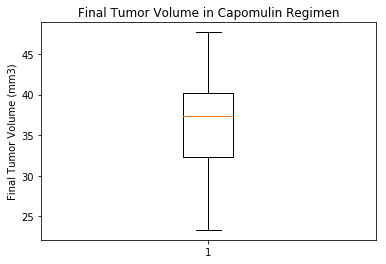

In [10]:
# Campomulin Regimen Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


In [11]:
# Select data for Ramicane regimen and reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()


# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list



0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Quartile Calculations

quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


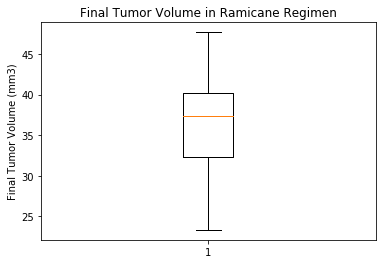

In [13]:
#Ramicane Regimen Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [14]:
# Select data for Infubinol regimen and reset index
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

# Convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list


0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Quartile Calculations

quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


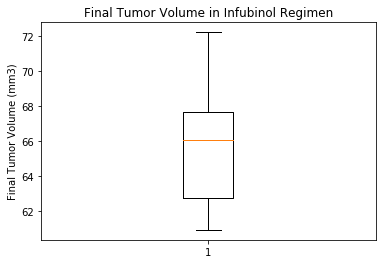

In [16]:
#Infubinol Regimen Box Plot 

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

In [17]:
# Select data for Ceftamin regimen and reset index
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#Quartile Calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


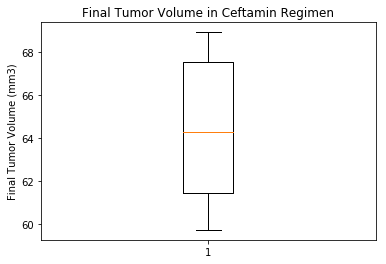

In [19]:
#Ceftamin Regimen
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

## Line and scatter plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Capomuin Data Frame
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


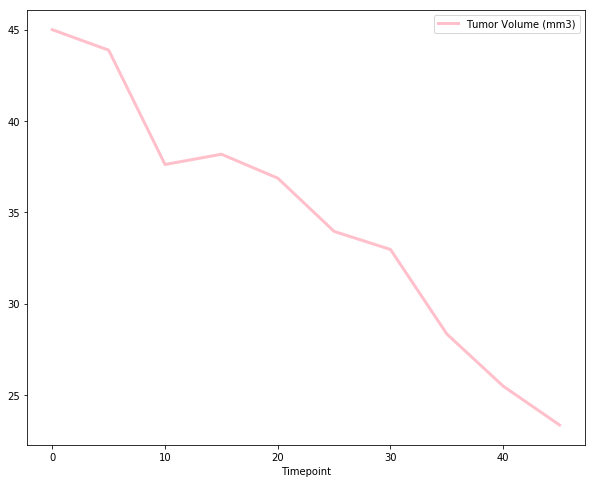

In [22]:
# Line chart
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=3, color='pink')


In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


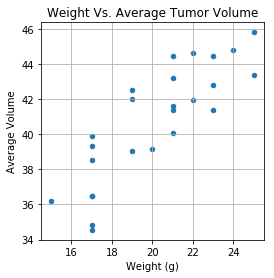

In [24]:
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

#Rename
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

#Scatter Plot
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Coefficient 
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
